<a href="https://colab.research.google.com/github/Haneenabuallam12/Haneenabuallam12/blob/main/w4c2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [93]:
Dates= ['2021','2022', '2023', '2024', '2025', '2026', '2027','2028', '2029','2030', '2031','2032' ]
Revenue = pd.Series(index=Dates, dtype='float64')
Revenue['2021'] = 222
#Revenue

In [94]:
growth_rate = 0.18
for year in range(1, 12):
    Revenue[year] = Revenue[year - 1] * (1 + growth_rate)
#Revenue

In [95]:
ebitda_margin = 0.45
ebitda = Revenue * ebitda_margin 
#ebitda

In [96]:
tax_rate = 0.21
taxes = -ebitda * tax_rate
tax_payment = taxes.apply(lambda x: min(x, 0))
#taxes

In [97]:
capex_percent = 0.03
capital_expenditures = -(Revenue * capex_percent)
#capital_expenditures

In [98]:
nwc_percent = 0.06
nwc = Revenue * nwc_percent
change_in_nwc = nwc.shift(1) - nwc
#to be changed to 0
#change_in_nw

In [99]:
cash_flow = ebitda + taxes + capital_expenditures + change_in_nwc
#cash_flow

In [100]:

discount_rate = 0.06
discount_factor= pd.Series(index=Dates, dtype='float64')

for year in range(0, 12):
    discount_factor[year]= (1 / (1 + discount_rate)) ** year
#discount_factor

In [101]:
#Present Value of Future Cash Flow
pv_of_fcf = (cash_flow * discount_factor)
#pv_of_fcf

In [102]:
data = {'revenue': Revenue,
        'EBITDA':ebitda, 
        'taxes':taxes, 
        'cap_ex':capital_expenditures, 
         'work_cap':change_in_nwc,
        'cash_flow':cash_flow, 
        'discount_factor': discount_factor, 
        'present_value_fcf':pv_of_fcf }
df = pd.DataFrame(data, index= Dates)  
df

,revenue,EBITDA,taxes,cap_ex,work_cap,cash_flow,discount_factor,present_value_fcf
2021,222.000000,99.900000,-20.979000,-6.660000,NaN,NaN,1.000000,NaN
2022,261.960000,117.882000,-24.755220,-7.858800,-2.397600,82.870380,0.943396,78.179604
2023,309.112800,139.100760,-29.211160,-9.273384,-2.829168,97.787048,0.889996,87.030125
2024,364.753104,164.138897,-34.469168,-10.942593,-3.338418,115.388717,0.839619,96.882592
2025,430.408663,193.683898,-40.673619,-12.912260,-3.939334,136.158686,0.792094,107.850433
2026,507.882222,228.547000,-47.994870,-15.236467,-4.648414,160.667250,0.747258,120.059915
2027,599.301022,269.685460,-56.633947,-17.979031,-5.485128,189.587355,0.704961,133.651604
2028,707.175206,318.228843,-66.828057,-21.215256,-6.472451,223.713078,0.665057,148.781974
2029,834.466743,375.510034,-78.857107,-25.034002,-7.637492,263.981433,0.627412,165.625217
2030,984.670757,443.101841,-93.051387,-29.540123,-9.012241,311.498090,0.591898,184.375241


In [103]:
#total present value of Future Cash Flows
t_pv_of_fcf = pv_of_fcf.sum()
t_pv_of_fcf

1556.1681370653096

In [104]:
#terminal_value 
ebitda_exit_multiple = 32.70
terminal_value = (ebitda_exit_multiple*ebitda[11])
terminal_value

20175.082590019254

In [105]:
#present_assets_value
present_assets_value = (t_pv_of_fcf + terminal_value)
present_assets_value

21731.250727084564

In [106]:
print(f"""Our projected Present Value of Projected Future Cash Flows are:{t_pv_of_fcf:.2f}.\n
We are providing revenue guidance in 2032 to be: {Revenue['2032']:.2f}.
      \nWith an estimated EBITDA around:{ebitda['2032']:.2f}.""")


Our projected Present Value of Projected Future Cash Flows are:1556.17.

We are providing revenue guidance in 2032 to be: 1371.06.
      
With an estimated EBITDA around:616.98.


In [107]:
print(f"""The terminal value at this time given a multiple of {ebitda_exit_multiple:.2f} 
\nand the above EBITDA for 2030, would equal: {terminal_value:.2f}.""")

The terminal value at this time given a multiple of 32.70 

and the above EBITDA for 2030, would equal: 20175.08.


Text(0, 0.5, 'Cash Flow')

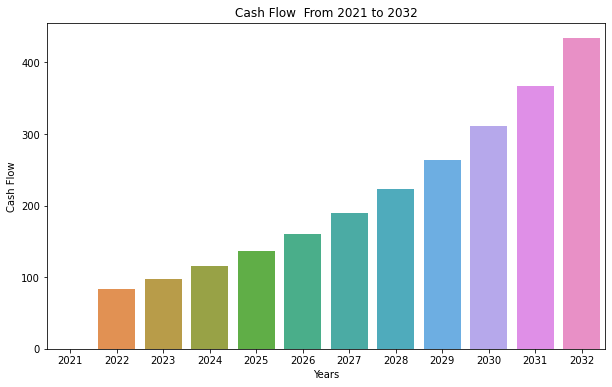

In [108]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Cash Flow  From 2021 to 2032")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.index, y=df['cash_flow'])

# Add label for vertical axis
plt.xlabel("Years")
plt.ylabel("Cash Flow")